In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\kevin\\Documents\\GIS\\POS4764\\Project'

In [3]:
os.chdir('Data')

In [4]:
os.listdir()

['Florida', 'flpoverty2018.csv']

In [5]:
poverty = pd.read_csv('flpoverty2018.csv')

In [6]:
poverty.head()

,County,PovertyRate,ccode
0,Alachua,0.212,1.0
1,Baker,0.153,3.0
2,Bay,0.149,5.0
3,Bradford,0.191,7.0
4,Brevard,0.124,9.0


In [7]:
os.chdir('Florida')
os.listdir()

['Florida_Counties.cpg',
 'Florida_Counties.dbf',
 'Florida_Counties.prj',
 'Florida_Counties.shp',
 'Florida_Counties.shx',
 'Florida_Counties.xml']

In [8]:
fl_counties = gpd.read_file('Florida_Counties.shp')

In [9]:
fl_counties['COUNTY'] = fl_counties['COUNTY'].astype(float)

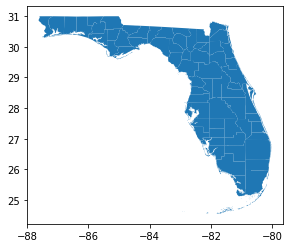

In [10]:
fl_counties.plot()

In [11]:
fl_counties.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTAre,ShapeSTLen,geometry
0,1,21,41.0,GILCHRIST,2000-05-16T00:00:00.000Z,9.908353e+09,4.873000e+05,POLYGON ((-82.65813600527831 29.83028106592836...
1,2,54,107.0,PUTNAM,2000-05-16T00:00:00.000Z,2.305869e+10,7.629677e+05,POLYGON ((-81.58084263191225 29.83955869988373...
2,3,62,123.0,TAYLOR,2000-05-16T00:00:00.000Z,2.891747e+10,8.772527e+05,(POLYGON ((-83.73036687278116 30.3035764144186...
3,4,46,91.0,OKALOOSA,2000-05-16T00:00:00.000Z,2.562159e+10,1.087058e+06,(POLYGON ((-86.39159408384468 30.6497039172779...
4,5,7,13.0,CALHOUN,2000-05-16T00:00:00.000Z,1.604809e+10,6.313440e+05,POLYGON ((-84.93265667941331 30.60636534524649...


In [12]:
fl_counties_pov = fl_counties.merge(poverty, left_on = 'COUNTY', right_on = 'ccode', how = 'left')
fl_counties_pov = fl_counties_pov.sort_values('PovertyRate')
fl_counties_pov.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTAre,ShapeSTLen,geometry,County,PovertyRate,ccode
66,67,55,109.0,ST. JOHNS,2000-05-16T00:00:00.000Z,1.784792e+10,1.130720e+06,(POLYGON ((-81.37788144125285 30.1078996789115...,St. Johns,0.083,109.0
28,29,60,119.0,SUMTER,2000-05-16T00:00:00.000Z,1.617104e+10,7.519140e+05,POLYGON ((-81.95433194295875 28.96002352989874...,Sumter,0.091,119.0
53,54,45,89.0,NASSAU,2000-05-16T00:00:00.000Z,1.766834e+10,1.275145e+06,(POLYGON ((-81.89150587604259 30.8168275494847...,Nassau,0.091,89.0
56,57,58,115.0,SARASOTA,2000-05-16T00:00:00.000Z,1.624460e+10,8.664802e+05,(POLYGON ((-82.52940806611684 27.3886696393451...,Sarasota,0.092,115.0
21,22,10,19.0,CLAY,2000-05-16T00:00:00.000Z,1.794850e+10,6.031178e+05,POLYGON ((-81.68007516544645 30.12155088244222...,Clay,0.099,19.0


Text(0.5, 1, 'Poverty Rate by County')

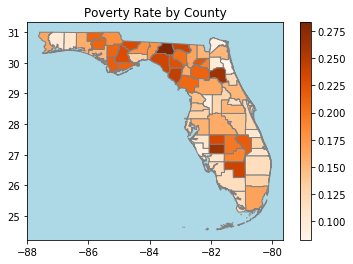

In [25]:
fig, ax = plt.subplots()
fl_counties_pov.plot(ax = ax, column='PovertyRate', cmap = "Oranges", edgecolor='grey', legend=True)
ax.set_facecolor('lightblue')
plt.title("Poverty Rate by County")